In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/NY_italian_restaurants (1).csv')
df

,Case,Restaurant,Price,Food,Decor,Service,East
0,1,Daniella Ristorante,43,22,18,20,0
1,2,Tello's Ristorante,32,20,19,19,0
2,3,Biricchino,34,21,13,18,0
3,4,Bottino,41,20,20,17,0
4,5,Da Umberto,54,24,19,21,0
...,...,...,...,...,...,...,...
163,164,Baci,31,17,15,16,0
164,165,Puccini,26,20,16,17,0
165,166,Bella Luna,31,18,16,17,0
166,167,MÃ©tisse,38,22,17,21,0


In [4]:
df.describe()

,Case,Price,Food,Decor,Service,East
count,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000
mean,84.500000,42.696429,20.595238,17.690476,19.39881,0.630952
std,48.641546,9.292814,1.982674,2.702743,2.11394,0.483989
min,1.000000,19.000000,16.000000,6.000000,14.00000,0.000000
25%,42.750000,36.000000,19.000000,16.000000,18.00000,0.000000
50%,84.500000,43.000000,20.500000,18.000000,20.00000,1.000000
75%,126.250000,50.000000,22.000000,19.000000,21.00000,1.000000
max,168.000000,65.000000,25.000000,25.000000,24.00000,1.000000


In [5]:
df.shape

(168, 7)

In [6]:
df.isnull().sum()

Case          0
Restaurant    0
Price         0
Food          0
Decor         0
Service       0
East          0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

Case          0
Restaurant    0
Price         0
Food          0
Decor         0
Service       0
East          0
dtype: int64

In [8]:
df.keys()

Index(['Case', 'Restaurant', 'Price', 'Food', 'Decor', 'Service', 'East'], dtype='object')

In [9]:
df2  = df[['Price', 'Food', 'Decor', 'Service']].copy()
df2

,Price,Food,Decor,Service
0,43,22,18,20
1,32,20,19,19
2,34,21,13,18
3,41,20,20,17
4,54,24,19,21
...,...,...,...,...
163,31,17,15,16
164,26,20,16,17
165,31,18,16,17
166,38,22,17,21


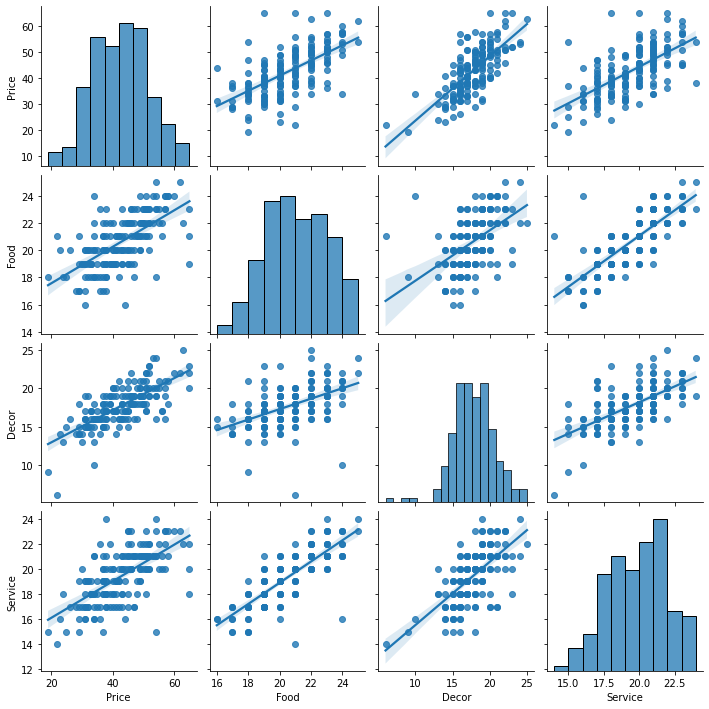

In [10]:
# kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}
sns.pairplot(df2, kind ='reg')

In [12]:
y = df2['Price']
X = df2[['Food', 'Decor', 'Service']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(134, 3) (34, 3) (134,) (34,)


In [15]:
X_train

,Food,Decor,Service
61,19,16,17
44,22,17,21
24,22,20,22
63,20,19,19
89,21,15,18
...,...,...,...
9,21,17,19
103,18,15,17
67,17,14,15
117,19,17,19


In [16]:
X_test

,Food,Decor,Service
151,23,19,23
56,23,17,20
123,20,23,20
60,24,20,21
100,19,18,21
51,20,20,20
7,20,18,21
5,22,22,21
86,23,18,20
135,19,19,18


In [47]:
lineal = LinearRegression()
lasso = Lasso(alpha = 1, max_iter= 10)
ridge = Ridge(alpha = 1, max_iter= 10)
elastic = ElasticNet(alpha = 1, l1_ratio = 0.1, max_iter= 10)

In [48]:
lineal.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e+01, tolerance: 1.258e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet(alpha=1, l1_ratio=0.1, max_iter=10)

In [49]:
print("coef Lineal ",lineal.coef_.tolist())
print("coef lasso ", lasso.coef_.tolist())
print("coef ridge ", ridge.coef_.tolist())
print("coef elastic ", elastic.coef_.tolist())


coef Lineal  [1.268297790508605, 1.8844780325113775, 0.5122271339146043]
coef lasso  [1.1152031282199169, 1.8666181711568561, 0.41955777297593333]
coef ridge  [1.263776498325395, 1.8818836728670552, 0.5170556925414382]
coef elastic  [0.9836600568171099, 1.6646523653630911, 0.7480645568344841]


In [51]:
# se realiza la predicción con los 4 sistemas lineas train
y_pred_train_lineal = lineal.predict(X_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_train_elastic = elastic.predict(X_train)
print("prediction lineal",y_pred_train_lineal[:7] )
print("prediction lasso",y_pred_train_lasso[:7])
print("prediction ridge",y_pred_train_ridge[:7])
print("prediction elastic",y_pred_train_elastic[:7])

prediction lineal [36.30106958 44.03934952 50.20501075 44.24725573 37.46541426 50.20501075
 45.72345974]
prediction lasso [36.79703178 43.68749043 49.70690271 44.35120497 37.58037764 49.70690271
 46.13012263]
prediction ridge [36.30129507 44.04273101 50.20543772 44.24483397 37.46402009 50.20543772
 45.71071344]
prediction elastic [36.56736983 44.17526059 49.91728224 44.04111609 37.61810213 49.91728224
 44.89063165]


In [52]:
# se realiza la predicción con los 4 sistemas lineas test
y_pred_test_lineal = lineal.predict(X_test)
y_pred_test_lasso = lasso.predict(X_test)
y_pred_test_ridge = ridge.predict(X_test)
y_pred_test_elastic = elastic.predict(X_test)
print("prediction lineal",y_pred_test_lineal[:7] )
print("prediction lasso",y_pred_test_lasso[:7])
print("prediction ridge",y_pred_test_ridge[:7])
print("prediction elastic",y_pred_test_elastic[:7])

prediction lineal [50.10105764 44.79542017 52.297395   52.2293792  42.11893418 46.6439609
 43.38723197]
prediction lasso [49.37504544 44.38313578 52.23723542 51.5177512  42.20849921 46.63738091
 43.32370234]
prediction ridge [50.10438624 44.78945181 52.28942436 52.21593502 42.13328519 46.64377334
 43.39706169]
prediction elastic [49.98435449 44.41085609 51.44779011 51.1365378  42.88893278 46.45383301
 43.87259284]


In [53]:
# obtenemos el error cuadratico medio
error_lineal_sq = metrics.mean_squared_error(y_train,y_pred_train_lineal)
error_lasso_sq = metrics.mean_squared_error(y_train,y_pred_train_lasso)
error_ridge_sq = metrics.mean_squared_error(y_train,y_pred_train_ridge)
error_elastic_sq = metrics.mean_squared_error(y_train,y_pred_train_elastic)
print("error cuadratico de lineal ",error_lineal_sq)
print("error cuadratico de lasso ",error_lasso_sq)
print("error cuadratico de ridge ",error_ridge_sq)
print("error cuadratico de elastic ",error_elastic_sq)

error cuadratico de lineal  32.73360017596516
error cuadratico de lasso  32.992731710521106
error cuadratico de ridge  32.73366062038406
error cuadratico de elastic  33.18249384352464


In [54]:
metrics.mean_squared_error(y_test,y_pred_test_lineal)

34.90467923649517

In [55]:
metrics.mean_absolute_error(y_train,y_pred_train_lineal)

4.5143548493673356

In [56]:
y_error_train_lineal = y_train - y_pred_train_lineal
y_error_train_lasso = y_train - y_pred_train_lasso
y_error_train_ridge = y_train - y_pred_train_ridge
y_error_train_elastic = y_train - y_pred_train_elastic

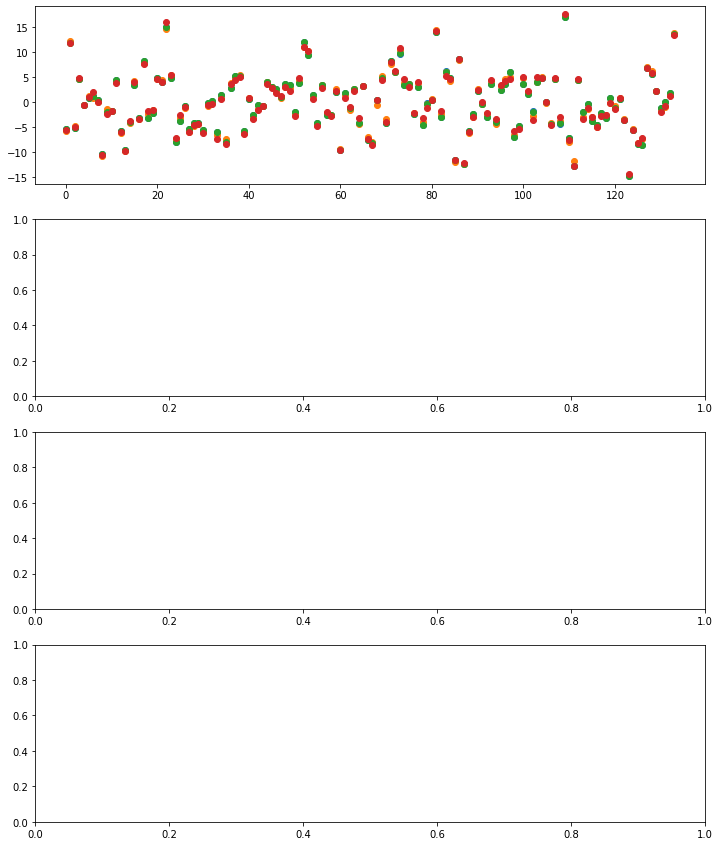

In [58]:
fig, axs = plt.subplots(4,figsize=(12,15))
axs[0].scatter(x = range(len(y_error_train_lineal)), y=y_error_train_lineal)
axs[0].scatter(x = range(len(y_error_train_lasso)), y=y_error_train_lasso)
axs[0].scatter(x = range(len(y_error_train_ridge)), y=y_error_train_ridge)
axs[0].scatter(x = range(len(y_error_train_elastic)), y=y_error_train_elastic)


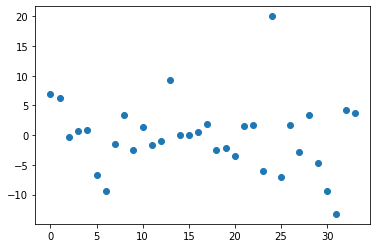

In [ ]:
y_error_test = y_test - y_pred_test_lineal
plt.scatter(x = range(len(y_error_test)), y=y_error_test)

In [72]:
resumen = []
for iter in list([1,10,100,1000]):
  for ap in list([0.1,0.3,0.6,1,1.5,3,5,10,50,100]):
    lineal = LinearRegression()
    lasso = Lasso(alpha = ap, max_iter= iter)
    ridge = Ridge(alpha = ap, max_iter= iter)
    elastic = ElasticNet(alpha = ap, l1_ratio = 0.1, max_iter= iter)

    lineal.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    elastic.fit(X_train,y_train)

    y_pred_train_lineal = lineal.predict(X_train)
    y_pred_train_lasso = lasso.predict(X_train)
    y_pred_train_ridge = ridge.predict(X_train)
    y_pred_train_elastic = elastic.predict(X_train)

    y_pred_test_lineal = lineal.predict(X_test)
    y_pred_test_lasso = lasso.predict(X_test)
    y_pred_test_ridge = ridge.predict(X_test)
    y_pred_test_elastic = elastic.predict(X_test)

    error_lineal_sq = metrics.mean_squared_error(y_train,y_pred_train_lineal)
    error_lasso_sq = metrics.mean_squared_error(y_train,y_pred_train_lasso)
    error_ridge_sq = metrics.mean_squared_error(y_train,y_pred_train_ridge)
    error_elastic_sq = metrics.mean_squared_error(y_train,y_pred_train_elastic)
    print([iter,ap,error_lineal_sq,error_lasso_sq,error_ridge_sq, error_elastic_sq])
    resumen.append([iter,ap,error_lineal_sq,error_lasso_sq,error_ridge_sq, error_elastic_sq])
rs = pd.DataFrame(resumen,columns = ['max_iter','alpha','lineal','lasso','ridge','elastic'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.471e+03, tolerance: 1.258e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+03, tolerance: 1.258e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[1, 0.1, 32.73360017596516, 38.214308067133224, 32.73360078721305, 37.936619523745584]
[1, 0.3, 32.73360017596516, 37.99594693966803, 32.733605663457745, 37.24543495285669]
[1, 0.6, 32.73360017596516, 37.71643453077566, 32.733622044069186, 36.41407641634433]
[1, 1, 32.73360017596516, 37.43340597922256, 32.73366062038406, 35.592788805178245]
[1, 1.5, 32.73360017596516, 36.81069453058049, 32.73373534158145, 34.91022613549191]
[1, 3, 32.73360017596516, 35.70335157915229, 32.734131093295645, 34.338702846562306]
[1, 5, 32.73360017596516, 36.40439426229148, 32.73504049914957, 35.525390989894106]
[1, 10, 32.73360017596516, 49.04450072869004, 32.73904672099686, 42.01106430539421]
[1, 50, 32.73360017596516, 93.873746936957, 32.830703909724036, 76.02766686893885]
[1, 100, 32.73360017596516, 93.873746936957, 33.03317990893112, 88.08027665198352]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.547e+01, tolerance: 1.258e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.532e+03, tolerance: 1.258e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[10, 0.1, 32.73360017596516, 32.736917161179, 32.73360078721305, 32.73675727269959]
[10, 0.3, 32.73360017596516, 32.755231228162735, 32.733605663457745, 32.78686031651505]
[10, 0.6, 32.73360017596516, 32.82494490472765, 32.733622044069186, 32.92587786066607]
[10, 1, 32.73360017596516, 32.992731710521106, 32.73366062038406, 33.18249384352464]
[10, 1.5, 32.73360017596516, 33.32440554421361, 32.73373534158145, 33.59187403671955]
[10, 3, 32.73360017596516, 35.13116249445558, 32.734131093295645, 35.25598696176974]
[10, 5, 32.73360017596516, 39.4336199200308, 32.73504049914957, 38.05454458663469]
[10, 10, 32.73360017596516, 53.380984326479314, 32.73904672099686, 45.59163695084083]
[10, 50, 32.73360017596516, 93.873746936957, 32.830703909724036, 76.86526420334762]
[10, 100, 32.73360017596516, 93.873746936957, 33.03317990893112, 88.23552970657703]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+01, tolerance: 1.258e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.441e+00, tolerance: 1.258e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[100, 0.1, 32.73360017596516, 32.73627815952351, 32.73360078721305, 32.74186197854239]
[100, 0.3, 32.73360017596516, 32.75778593128488, 32.733605663457745, 32.794374280454]
[100, 0.6, 32.73360017596516, 32.830395639909064, 32.733622044069186, 32.92976774578258]
[100, 1, 32.73360017596516, 33.002562741154506, 32.73366062038406, 33.183316621525634]
[100, 1.5, 32.73360017596516, 33.33887691205196, 32.73373534158145, 33.5918443071902]
[100, 3, 32.73360017596516, 35.1551629352424, 32.734131093295645, 35.25598696176974]
[100, 5, 32.73360017596516, 39.46048228726722, 32.73504049914957, 38.05454458663469]
[100, 10, 32.73360017596516, 53.380984326479314, 32.73904672099686, 45.59163695084083]
[100, 50, 32.73360017596516, 93.873746936957, 32.830703909724036, 76.86526420334762]
[100, 100, 32.73360017596516, 93.873746936957, 33.03317990893112, 88.23552970657703]
[1000, 0.1, 32.73360017596516, 32.73627815952351, 32.73360078721305, 32.74186197854239]
[1000, 0.3, 32.73360017596516, 32.75778593128488, 

In [85]:
rs

,max_iter,alpha,lineal,lasso,ridge,elastic
0,1,0.1,32.7336,38.214308,32.733601,37.936620
1,1,0.3,32.7336,37.995947,32.733606,37.245435
2,1,0.6,32.7336,37.716435,32.733622,36.414076
3,1,1.0,32.7336,37.433406,32.733661,35.592789
4,1,1.5,32.7336,36.810695,32.733735,34.910226
5,1,3.0,32.7336,35.703352,32.734131,34.338703
6,1,5.0,32.7336,36.404394,32.735040,35.525391
7,1,10.0,32.7336,49.044501,32.739047,42.011064
8,1,50.0,32.7336,93.873747,32.830704,76.027667
9,1,100.0,32.7336,93.873747,33.033180,88.080277


In [77]:
rs.lasso.sort_values(ascending=False)

39    93.873747
38    93.873747
29    93.873747
28    93.873747
8     93.873747
9     93.873747
19    93.873747
18    93.873747
37    53.380984
27    53.380984
17    53.380984
7     49.044501
36    39.460482
26    39.460482
16    39.433620
0     38.214308
1     37.995947
2     37.716435
3     37.433406
4     36.810695
6     36.404394
5     35.703352
25    35.155163
35    35.155163
15    35.131162
24    33.338877
34    33.338877
14    33.324406
23    33.002563
33    33.002563
13    32.992732
32    32.830396
22    32.830396
12    32.824945
31    32.757786
21    32.757786
11    32.755231
10    32.736917
30    32.736278
20    32.736278
Name: lasso, dtype: float64

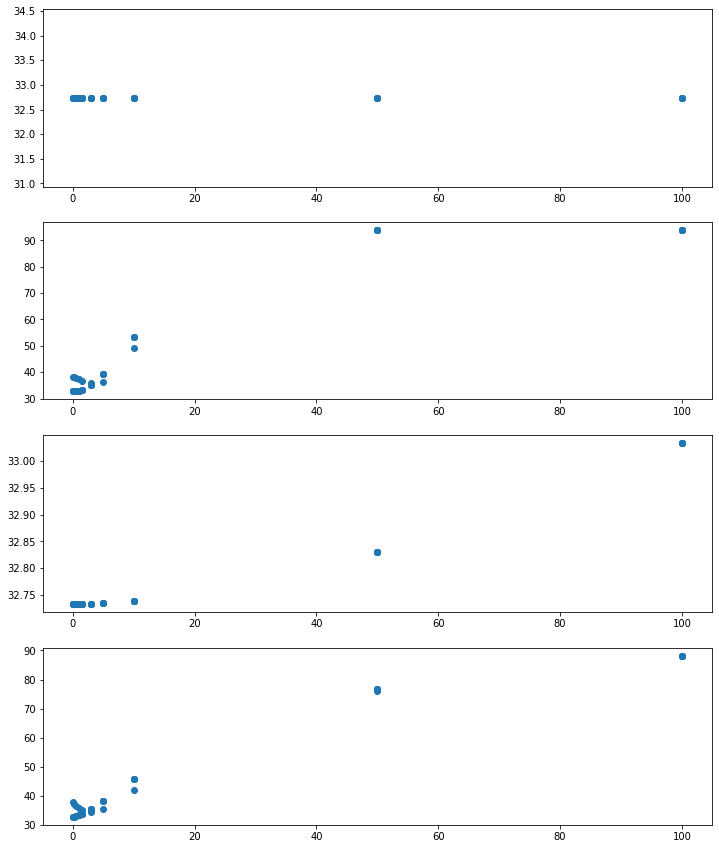

In [84]:
fig, axs = plt.subplots(4,figsize=(12,15))
axs[0].scatter(x = rs.alpha , y=rs.lineal)
axs[1].scatter(x = rs.alpha, y=rs.lasso)
axs[2].scatter(x = rs.alpha, y=rs.ridge)
axs[3].scatter(x = rs.alpha, y=rs.elastic)

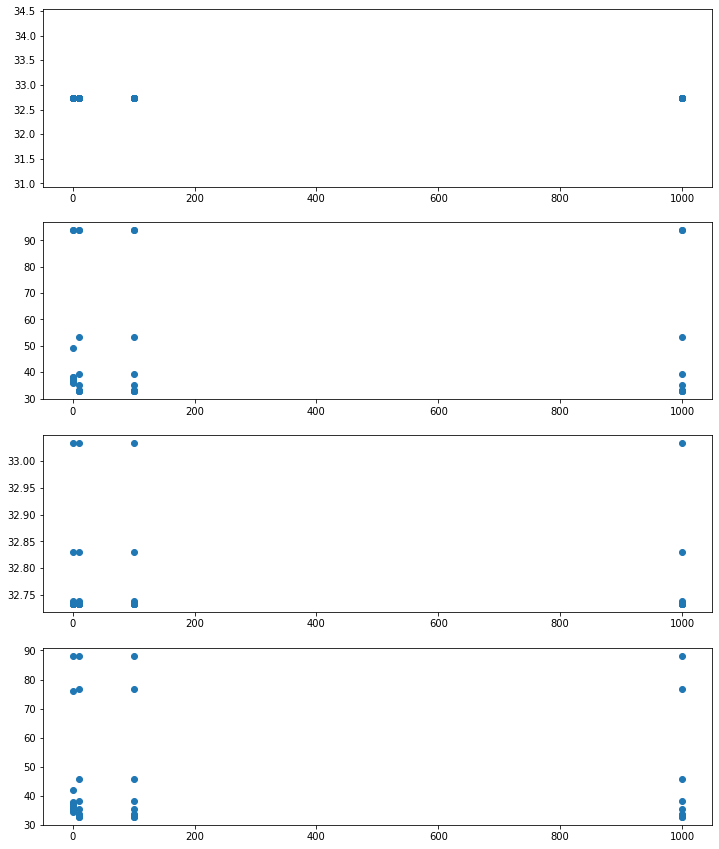

In [86]:
fig, axs = plt.subplots(4,figsize=(12,15))
axs[0].scatter(x = rs.max_iter , y=rs.lineal)
axs[1].scatter(x = rs.max_iter, y=rs.lasso)
axs[2].scatter(x = rs.max_iter, y=rs.ridge)
axs[3].scatter(x = rs.max_iter, y=rs.elastic)